# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [12]:
#print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
#api.openweathermap.org/data/2.5/weather?q={city name}
#"api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url  = f"{base_url}appid={weather_api_key}&units={units}&q="

print(query_url)
cloudiness = []
countries = []
date = []
humidities = []
latitudes = []
longitudes = []
temperatures = []
windspeeds = []
citi_names = []

for city in cities:
    try:
        
        response = requests.get(query_url + city).json()
        temperatures.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        humidities.append(response['main']['humidity'])
        citi_names.append(response['name'])
        date.append(response['dt'])
        countries.append(response['sys']['country'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        windspeeds.append(response['wind']['speed'])
    except:
        print("city not found")
print(temperatures)

https://api.openweathermap.org/data/2.5/weather?appid=714c9e07623171463a4e0f55129a25ae&units=metric&q=
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not fou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
Data = pd.DataFrame({"City": citi_names, "Cloudiness": cloudiness, "Country": countries,
              "Date": date, "Humidity": humidities, "Lat": latitudes,
              "Lng": longitudes, "Max Temp(C)": temperatures, "Wind Speed": windspeeds} )
Data.count()

City           560
Cloudiness     560
Country        560
Date           560
Humidity       560
Lat            560
Lng            560
Max Temp(C)    560
Wind Speed     560
dtype: int64

In [19]:
Data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp(C),Wind Speed
0,Fortuna,20,US,1569548205,77,40.60,-124.16,18.33,5.10
1,Sarkand,99,KZ,1569548205,27,45.41,79.91,17.64,2.71
2,Iqaluit,90,CA,1569548205,80,63.75,-68.52,4.00,11.80
3,Dafeng,100,CN,1569548205,52,33.20,120.46,24.54,2.43
4,Rikitea,39,PF,1569548206,71,-23.12,-134.97,22.14,4.70


In [20]:
Data.to_csv("Data.csv", index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

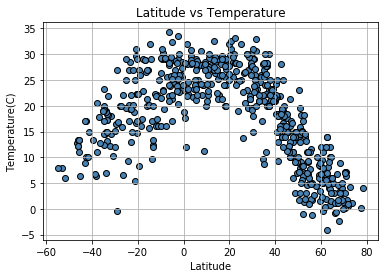

In [17]:
plt.scatter(Data['Lat'], Data['Max Temp(C)'], marker ="o", facecolor="steelblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature(C)")
plt.title("Latitude vs Temperature")
plt.grid(which="both")
plt.show()

#### Latitude vs. Humidity Plot

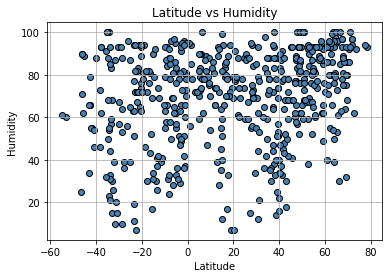

In [100]:
plt.scatter(Data['Lat'], Data['Humidity'], marker ="o", facecolor="steelblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.grid(which="both")
plt.show()

#### Latitude vs. Cloudiness Plot

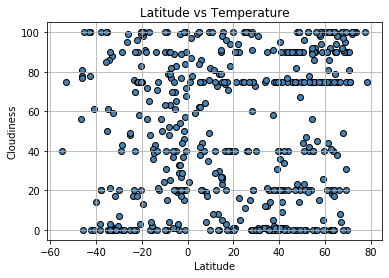

In [101]:
plt.scatter(Data['Lat'], Data['Cloudiness'], marker ="o", facecolor="steelblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Temperature")
plt.grid(which="both")
plt.show()

#### Latitude vs. Wind Speed Plot

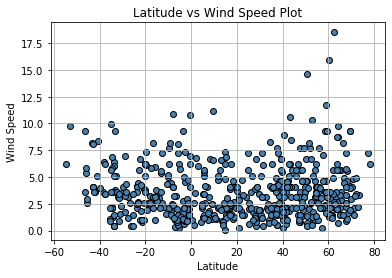

In [98]:
plt.scatter(Data['Lat'], Data['Wind Speed'], marker ="o", facecolor="steelblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed Plot")
plt.grid(which="both")
plt.show()

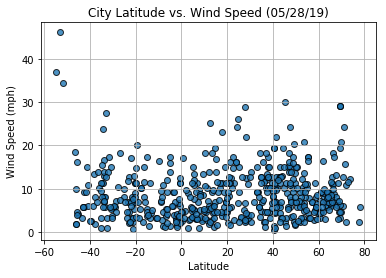

## Linear Regression

In [117]:
# OPTIONAL: Create a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress-values = x_values*slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [118]:
#df_north = Data.loc[Data["Lng"]>0,:]
#df_north.head()

In [119]:
# Create Northern and Southern Hemisphere DataFrames


In [21]:
df_north = Data.loc[Data["Lng"]>0,:]
#df_north.head()
df_south = Data.loc[Data["Lng"]<=0,:]
#df_south

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

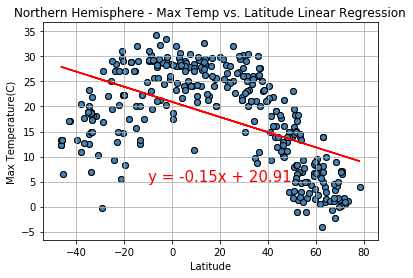

In [32]:
x_values = df_north['Lat']
y_values = df_north['Max Temp(C)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
slope
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.grid(which="both")
plt.scatter(x_values,y_values, marker ="o", facecolor="steelblue", edgecolors="black" )
plt.show()

The r-squared is: -0.8151657406810827


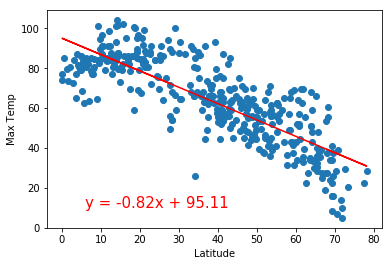

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


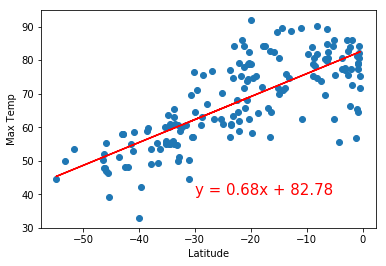

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


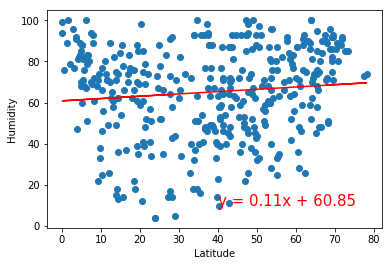

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


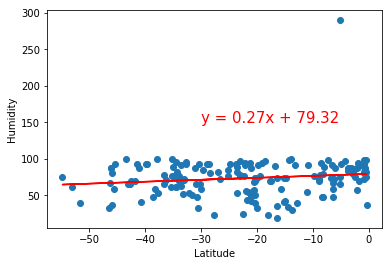

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


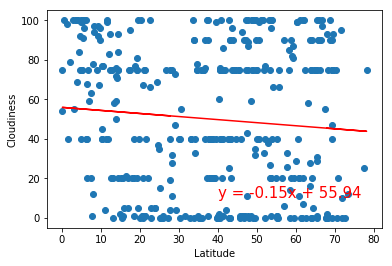

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


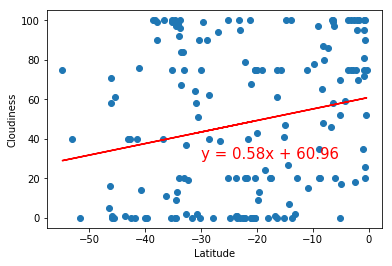

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


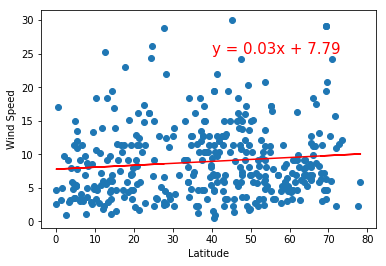

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


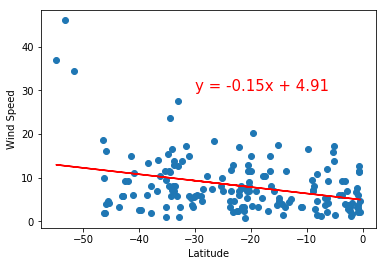